In [19]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as sm
import statsmodels.api as smf
%matplotlib inline

In [2]:
from Parameters import *
from Run_LCA_model import Run_LCA_model

In [156]:
buildings_path = '..\shapefiles\\building_block_people_WGS_3_int.csv'
schedule = 'scheduled' 
logistics = 'random'
n_collection = 1
Result_Energy = pd.DataFrame()
Result_GHG = pd.DataFrame()
Result_Energy_m3 = pd.DataFrame()
Result_GHG_m3 = pd.DataFrame()
i=2
while i < 100:
    n_regen = i
    Total_Energy_total, Total_GHG_total, Total_Energy_m3, Total_GHG_m3 = Run_LCA_model(buildings_path, n_regen, n_collection, schedule, logistics)
    Result_Energy_m3 = Result_Energy_m3.append(Total_Energy_m3)
    Result_GHG_m3 = Result_GHG_m3.append(Total_GHG_m3)
    Result_Energy = Result_Energy.append(Total_Energy_total)
    Result_GHG = Result_GHG.append(Total_GHG_total)
    print i
    if i<10:
        i = i + 2
    else:
        i = i+10

Start calculating distances for scheduled...
calc distances took time 11.6710000038
2
Start calculating distances for scheduled...
calc distances took time 11.9240000248
4
Start calculating distances for scheduled...
calc distances took time 15.0859999657
6
Start calculating distances for scheduled...
calc distances took time 12.8120000362
8
Start calculating distances for scheduled...
calc distances took time 14.0329999924
10
Start calculating distances for scheduled...
calc distances took time 15.6129999161
20
Start calculating distances for scheduled...
calc distances took time 14.4900000095
30
Start calculating distances for scheduled...
calc distances took time 15.5620000362
40
Start calculating distances for scheduled...
calc distances took time 17.7349998951
50
Start calculating distances for scheduled...
calc distances took time 16.8190000057
60
Start calculating distances for scheduled...
calc distances took time 16.8179998398
70
Start calculating distances for scheduled...
ca

In [157]:
Result_Energy

,Resin manufacturing,Resin transport,Catridge manufacturing,Catridge transport,Tank manufacturing,Tank transport,Pump operation,Pump manufacturing,Pump transport,Acid manufacturing,Acid transport,Logistics_regen,trucks manufacturing,Logistics_collect
0,1783820.814717,832,782355.832912,31.2,427.993603,31.2,3362.046908,1656.743906,156,201029.207483,1560,1841127.262848,264626.666667,1167.776016
0,2046036.691570,1664,897359.604056,62.4,495.204935,62.4,6724.093817,3313.487812,312,230579.849273,3120,2103503.647393,309720.000000,2333.230728
0,2207746.503962,2496,968282.991608,93.6,540.401844,93.6,10086.140725,4970.231719,468,248803.874444,4680,2189409.427608,352440.000000,2996.470596
0,2041572.959578,3328,895401.881211,124.8,503.983146,124.8,13448.187633,6626.975625,624,230076.805191,6240,1874837.337955,309720.000000,4259.061318
0,2078859.694032,4160,911755.258159,156.0,517.423154,156.0,16810.234542,8283.719531,780,234278.865519,7800,2056668.183966,353626.666667,4896.671591
0,2287136.508422,8320,1003102.202456,312.0,577.186542,312.0,33620.469083,16567.439062,1560,257750.798680,15600,2092360.451435,356000.000000,7376.554193
0,2279607.987248,12480,999800.311142,468.0,588.497048,468.0,50430.703625,24851.158593,2340,256902.365568,23400,1916353.029724,347693.333333,7251.610906
0,2370477.912749,16640,1039654.435315,624.0,619.168383,624.0,67240.938166,33134.878124,3120,267143.029292,31200,1966022.114934,363120.000000,10012.526308
0,2351632.066957,20800,1031388.942918,780.0,624.174664,780.0,84051.172708,41418.597655,3900,265019.180633,39000,1881266.684597,347693.333333,11746.612454
0,2316342.507435,24960,1015911.495573,936.0,618.163122,936.0,100861.407249,49702.317186,4680,261042.193637,46800,1850444.079700,345320.000000,11728.491656


In [158]:
Result_Energy_m3["sum"] = (Result_Energy_m3.sum(axis=1)) - Result_Energy_m3["n_facilities"]
Result_GHG_m3["sum"] = (Result_GHG_m3.sum(axis=1)) - Result_GHG_m3["n_facilities"]

In [159]:
Result_Energy_m3

,Resin manufacturing,Resin transport,Catridge manufacturing,Catridge transport,Tank manufacturing,Tank transport,Pump operation,Pump manufacturing,Pump transport,Acid manufacturing,Acid transport,Logistics_regen,trucks manufacturing,Logistics_collect,n_facilities,sum
0,8.405088,0.003920,3.68634,0.000147,0.002017,0.000147,0.015841,0.007806,0.000735,0.947219,0.007350,8.675107,1.246880,0.005502,2,23.004099
0,8.405088,0.006836,3.68634,0.000256,0.002034,0.000256,0.027622,0.013612,0.001282,0.947219,0.012817,8.641161,1.272325,0.009585,4,23.026433
0,8.405088,0.009502,3.68634,0.000356,0.002057,0.000356,0.038399,0.018922,0.001782,0.947219,0.017817,8.335277,1.341771,0.011408,6,22.816294
0,8.405088,0.013701,3.68634,0.000514,0.002075,0.000514,0.055366,0.027283,0.002569,0.947219,0.025690,7.718643,1.275107,0.017534,8,22.177641
0,8.405088,0.016819,3.68634,0.000631,0.002092,0.000631,0.067966,0.033492,0.003154,0.947219,0.031536,8.315365,1.429757,0.019798,10,22.959886
0,8.405088,0.030575,3.68634,0.001147,0.002121,0.001147,0.123553,0.060884,0.005733,0.947219,0.057329,7.689298,1.308278,0.027108,20,22.345820
0,8.405088,0.046015,3.68634,0.001726,0.002170,0.001726,0.185942,0.091628,0.008628,0.947219,0.086278,7.065739,1.281972,0.026737,30,21.837205
0,8.405088,0.059001,3.68634,0.002213,0.002195,0.002213,0.238419,0.117488,0.011063,0.947219,0.110627,6.970994,1.287527,0.035502,40,21.875887
0,8.405088,0.074342,3.68634,0.002788,0.002231,0.002788,0.300412,0.148036,0.013939,0.947219,0.139392,6.723931,1.242708,0.041984,50,21.731197
0,8.405088,0.090570,3.68634,0.003396,0.002243,0.003396,0.365986,0.180350,0.016982,0.947219,0.169819,6.714527,1.253029,0.042558,60,21.881503


Result_Energy_m3 = pd.read_csv('Energy_result.csv')
Result_GHG_m3 = pd.read_csv('GHG_result.csv')

Result_Energy_m3=pd.read_csv('Energy_result_unscheduled.csv')
Result_GHG_m3=pd.read_csv('GHG_result_unscheduled.csv')

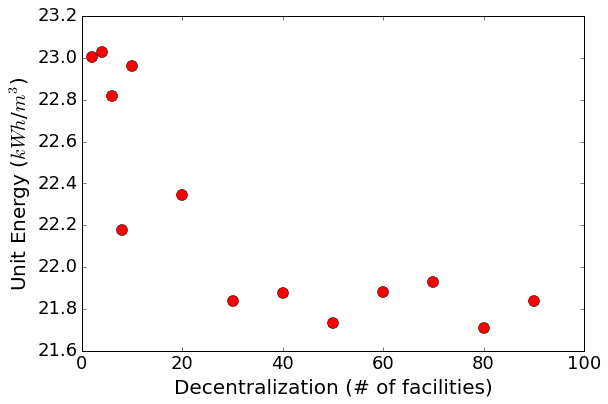

In [160]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(50,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

In [161]:
Result_Energy_m3.to_csv('../results/Energy_m3_random.csv')
Result_GHG_m3.to_csv('../results/GHG_m3_random.csv')

In [135]:
Result_Energy_m3=Result_Energy_m3[1:]
Result_Energy_m3=Result_Energy_m3[2:]
Result_GHG_m3 = Result_GHG_m3[1:]
Result_GHG_m3 = Result_GHG_m3[2:]

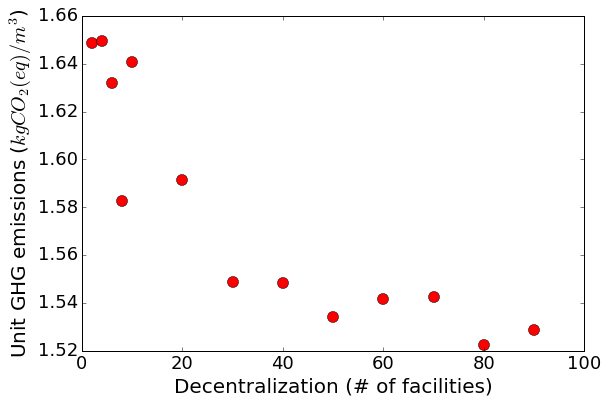

In [162]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

In [163]:
Result_Energy_m3_plot = Result_Energy_m3[8:9].drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3[8:9].drop('sum',1).drop('n_facilities',1)

In [164]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Resin transport'] + Result_Energy_m3_plot['Catridge transport']+
                                  Result_Energy_m3_plot['Tank transport'] + Result_Energy_m3_plot['Pump transport'] +
                                  Result_Energy_m3_plot['Acid transport']+ Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Resin transport'] + Result_GHG_m3_plot['Catridge transport']+
                                  Result_GHG_m3_plot['Tank transport'] + Result_GHG_m3_plot['Pump transport'] +
                                  Result_GHG_m3_plot['Acid transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)

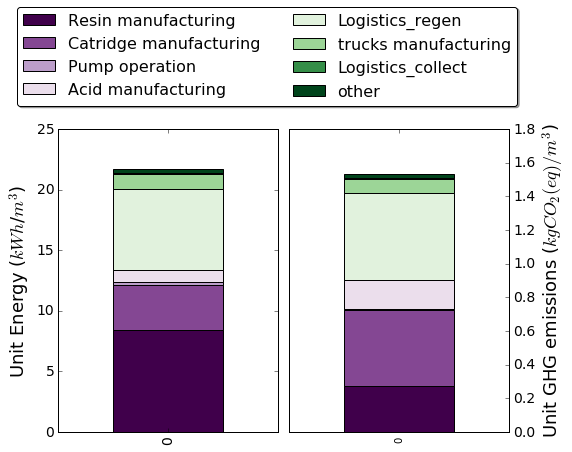

In [165]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,2, 1)
a=Result_Energy_m3_plot.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 25)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,2, 2)
b=Result_GHG_m3_plot.plot(kind='bar', stacked = True, secondary_y=True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1.8)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
b.legend(loc='lower center', bbox_to_anchor=(-0.1, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
fig.tight_layout()

In [173]:
Energy_optimal = pd.read_csv('../results/Energy_m3_optimal.csv')
Energy_grid = pd.read_csv('../results/Energy_m3_grid.csv')
Energy_random = pd.read_csv('../results/Energy_m3_random.csv')
GHG_optimal = pd.read_csv('../results/GHG_m3_optimal.csv')
GHG_grid = pd.read_csv('../results/GHG_m3_grid.csv')
GHG_random = pd.read_csv('../results/GHG_m3_random.csv')

In [178]:
Energy_optimal_log= Energy_optimal
Energy_optimal_log['logx'] = np.log(Energy_optimal_log['n_facilities'])
Energy_optimal_log['logEnergy'] = np.log(Energy_optimal_log['sum'])
energy_optimal = np.array(Energy_optimal_log['logEnergy'])
scale_optimal = np.array(Energy_optimal_log['logx'])

Energy_grid_log= Energy_grid
Energy_grid_log['logx'] = np.log(Energy_grid_log['n_facilities'])
Energy_grid_log['logEnergy'] = np.log(Energy_grid_log['sum'])
energy_grid = np.array(Energy_grid_log['logEnergy'])
scale_grid = np.array(Energy_grid_log['logx'])

Energy_random_log= Energy_random
Energy_random_log['logx'] = np.log(Energy_random_log['n_facilities'])
Energy_random_log['logEnergy'] = np.log(Energy_random_log['sum'])
energy_random = np.array(Energy_random_log['logEnergy'])
scale_random = np.array(Energy_random_log['logx'])

GHG_optimal_log = GHG_optimal
GHG_optimal_log['logx'] = np.log(GHG_optimal_log['n_facilities'])
GHG_optimal_log['logGHG'] = np.log(GHG_optimal_log['sum'])
GHG_optimal = np.array(GHG_optimal_log['logGHG'])

GHG_grid_log= GHG_grid
GHG_grid_log['logx'] = np.log(GHG_grid_log['n_facilities'])
GHG_grid_log['logGHG'] = np.log(GHG_grid_log['sum'])
GHG_grid = np.array(GHG_grid_log['logGHG'])

GHG_random_log= GHG_random
GHG_random_log['logx'] = np.log(GHG_random_log['n_facilities'])
GHG_random_log['logGHG'] = np.log(GHG_random_log['sum'])
GHG_random = np.array(GHG_random_log['logGHG'])


In [179]:
X_optimal = smf.add_constant(scale_optimal)
model = smf.OLS(energy_optimal , X_optimal)
results_optimal_energy = model.fit()

X_grid = smf.add_constant(scale_grid)
model = smf.OLS(energy_grid , X_grid)
results_grid_energy = model.fit()

X_random = smf.add_constant(scale_random)
model = smf.OLS(energy_random , X_random)
results_random_energy = model.fit()

X_optimal_GHG = smf.add_constant(scale_optimal)
model = smf.OLS(GHG_optimal , X_optimal_GHG)
results_optimal_GHG = model.fit()

X_grid_GHG = smf.add_constant(scale_grid)
model = smf.OLS(GHG_grid , X_grid_GHG)
results_grid_GHG = model.fit()

X_random_GHG = smf.add_constant(scale_random)
model = smf.OLS(GHG_random , X_random_GHG)
results_random_GHG = model.fit()

In [180]:
x1 = np.linspace(0,100, 500) # 100 linearly spaced numbers
y1_optimal = (x1**(results_optimal_energy.params[1]))*math.exp(results_optimal_energy.params[0])
aa=zip(x1,y1_optimal)
pl_optimal=pd.DataFrame(aa)
pl_optimal.columns=['x','grid']

y1_grid = (x1**(results_grid_energy.params[1]))*math.exp(results_grid_energy.params[0])
aa=zip(x1,y1_grid)
pl_grid=pd.DataFrame(aa)
pl_grid.columns=['x','iso-distant']

y1_random = (x1**(results_random_energy.params[1]))*math.exp(results_random_energy.params[0])
aa=zip(x1,y1_random)
pl_random=pd.DataFrame(aa)
pl_random.columns=['x','random']

y1_optimal_GHG = (x1**(results_optimal_GHG.params[1]))*math.exp(results_optimal_GHG.params[0])
aa=zip(x1,y1_optimal_GHG)
pl_optimal_GHG=pd.DataFrame(aa)
pl_optimal_GHG.columns=['x','grid']

y1_grid_GHG = (x1**(results_grid_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=zip(x1,y1_grid_GHG)
pl_grid_GHG=pd.DataFrame(aa)
pl_grid_GHG.columns=['x','iso-distant']

y1_random_GHG = (x1**(results_random_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=zip(x1,y1_random_GHG)
pl_random_GHG=pd.DataFrame(aa)
pl_random_GHG.columns=['x','random']

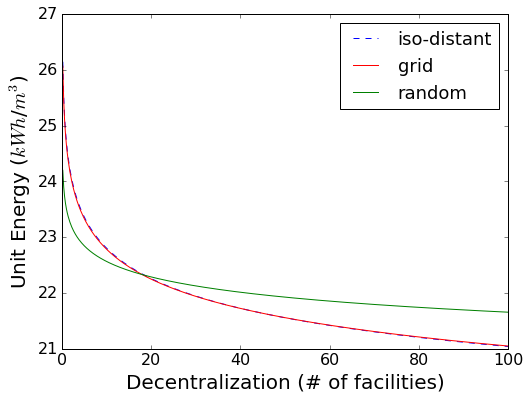

In [181]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
g = pl_grid.plot( x='x', y='iso-distant',fontsize=16, c='b',linestyle='--', ax=ax)
f = pl_optimal.plot( x='x', y='grid',fontsize=16, c='r', ax=ax)
h = pl_random.plot( x='x', y='random',fontsize=16, c='g', ax=ax)
h.legend(fontsize=18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

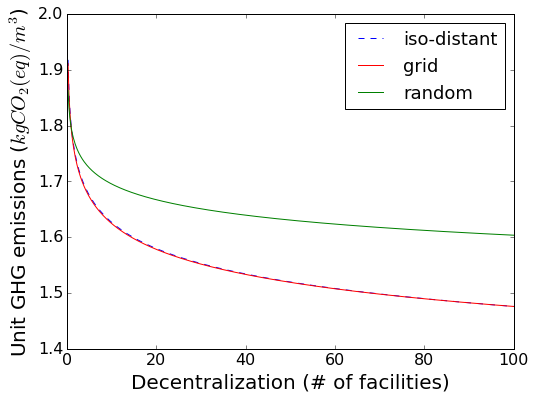

In [182]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
g = pl_grid_GHG.plot( x='x', y='iso-distant',fontsize=16, c='b',linestyle='--', ax=ax)
f = pl_optimal_GHG.plot( x='x', y='grid',fontsize=16, c='r', ax=ax)
h = pl_random_GHG.plot( x='x', y='random',fontsize=16, c='g', ax=ax)
h.legend(fontsize=18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)